In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans
import pickle

In [4]:
file_path = '/Users/ayyoub-maulana/gitRepo/k-means-cluster/data/country_location.csv'

sns.set()

data = pd.read_csv(file_path)

print(data)


     Country  Latitude  Longitude Language
0        USA     44.97    -103.77  English
1     Canada     62.40     -96.80  English
2     France     46.75       2.40   French
3         UK     54.01      -2.53  English
4    Germany     51.15      10.40   German
5  Australia    -25.45     133.11  English


In [3]:
with open('/Users/ayyoub-maulana/gitRepo/k-means-cluster/output/kmeans_location.pkl', 'rb') as f:
    k_means_model = pickle.load(f)

k_means_model

KMeans(n_clusters=3)

In [5]:
x = data.iloc[:,1:3]

x

,Latitude,Longitude
0,44.97,-103.77
1,62.40,-96.80
2,46.75,2.40
3,54.01,-2.53
4,51.15,10.40
5,-25.45,133.11


In [7]:
identified_clusters = k_means_model.fit_predict(x)

print(identified_clusters)

[1 1 0 0 0 2]


/opt/homebrew/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [8]:
data_with_clusters = data.copy()

data_with_clusters

,Country,Latitude,Longitude,Language
0,USA,44.97,-103.77,English
1,Canada,62.40,-96.80,English
2,France,46.75,2.40,French
3,UK,54.01,-2.53,English
4,Germany,51.15,10.40,German
5,Australia,-25.45,133.11,English


In [9]:
data_with_clusters['Clusters'] = identified_clusters

data_with_clusters

,Country,Latitude,Longitude,Language,Clusters
0,USA,44.97,-103.77,English,1
1,Canada,62.40,-96.80,English,1
2,France,46.75,2.40,French,0
3,UK,54.01,-2.53,English,0
4,Germany,51.15,10.40,German,0
5,Australia,-25.45,133.11,English,2


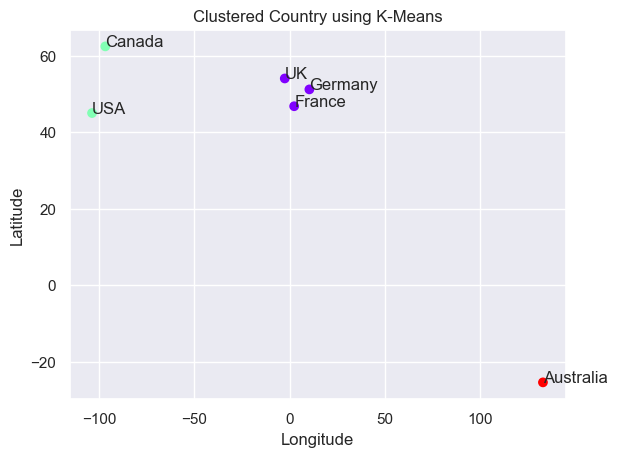

In [10]:
plt.scatter(data_with_clusters['Longitude'], data_with_clusters['Latitude'], c=data_with_clusters['Clusters'], cmap='rainbow')

# label plot
plt.title('Clustered Country using K-Means')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# anotasi plot
for i, txt in enumerate(data_with_clusters['Country']):
    plt.annotate(txt, (x.loc[i, 'Longitude'], x.loc[i, 'Latitude']))
